# **SM Heart Disease Kaggle Project**
Part I: Perform Exploratory Data Analysis (EDA)

I created this notebook to explore a heart disease dataset found here: https://www.kaggle.com/ronitf/heart-disease-uci

***

# **Data Exploration**

Some graphs done together in class, others I expanded on!

## **Load libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Load dataset**

In [2]:
#load the data
#df = pd.read_csv('heart.csv')
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
df = pd.read_csv('heart.csv')

 df.head gives us the top 5 entries and is common for df exploration 

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


df.info gives us an overview and is common for df exploration 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


df.describe gives summary statistics of variables and is common for df exploration 

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


df.isnull is a common EDA exploration and shows us any null or missing data values

In [7]:
#df.isnull() gives overall
df.isnull().sum()   #gives columns with null data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

df.corr is a common EDA exploration for if we're wondering whether any features might be particularly informative, to help us  predict target. The closer the value is to 1, the higher correlation.

In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## **Find shape of data set**

In [9]:
df.shape

(303, 14)

## **How many heart disease cases do we have in this set, and how do some features relate?**
 Things could get challenging if it's a giant dataset (1,000+) and we only have 2 samples, so df['target'].value_counts can show us what we can get for the target value.

 P.S. we have discovered that 0 = heart disease, 1 = no heart disease (see conclusion for confusion discussion)

In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
df.groupby('ca')['target'].value_counts()

ca  target
0   1         130
    0          45
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   1           4
    0           1
Name: target, dtype: int64

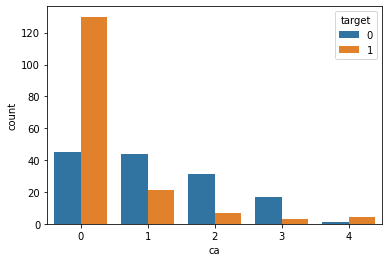

In [12]:
sns.countplot(x ='ca', hue = 'target', data = df)

In [13]:
df.groupby('thal')['target'].value_counts()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     1         130
      0          36
3     0          89
      1          28
Name: target, dtype: int64

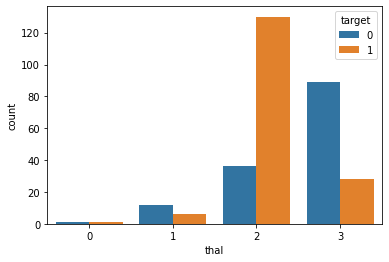

In [14]:
sns.countplot(x ='thal', hue = 'target', data = df)

In [15]:
df.groupby('target')['thal'].value_counts()

target  thal
0       3        89
        2        36
        1        12
        0         1
1       2       130
        3        28
        1         6
        0         1
Name: thal, dtype: int64

In [16]:
df.groupby('cp')['ca'].value_counts()

cp  ca
0   0     65
    1     34
    2     29
    3     14
    4      1
1   0     37
    1      8
    2      3
    3      1
    4      1
2   0     57
    1     20
    3      5
    4      3
    2      2
3   0     16
    2      4
    1      3
Name: ca, dtype: int64

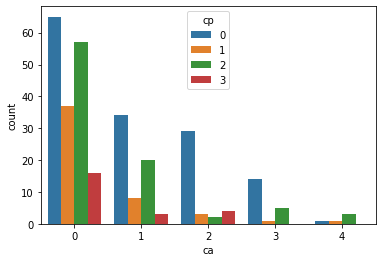

In [17]:
#cp: chest pain type; Value 0: asymptomatic; Value 1: atypical angina; Value 2: non-anginal pain;  Value 3: typical angina
sns.countplot(x ='ca', hue = 'cp', data = df)

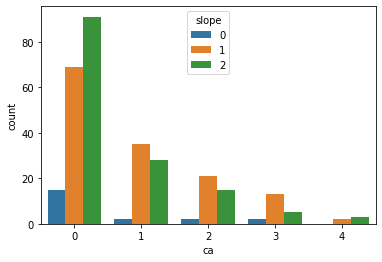

In [ ]:
#Slope is the "slope of the peak exercise ST segment: Value 0: downsloping, Value 1: flat, Value 2: upsloping"
#Ca is the "number of major vessels (0-3) colored by flourosopy"
sns.countplot(x ='ca', hue = 'slope', data = df)

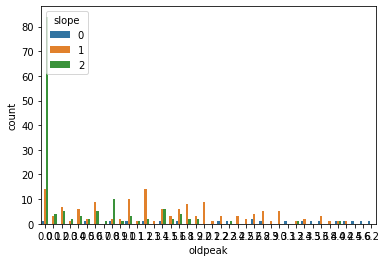

In [ ]:
#Oldpeak and slope seem like they should be related since they both measure aspects of the ST segment in an ECG
sns.countplot(x ='oldpeak', hue = 'slope', data = df)

## **Break the target values down by sex:**

In [18]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

In [19]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

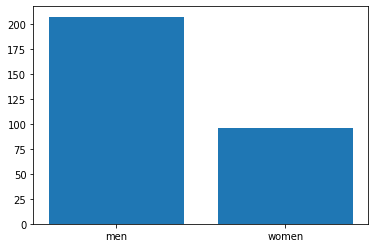

In [20]:
df['sex'].value_counts()
x = ['men', 'women']
y = [207, 96]
plt.bar(x,y)
plt.show()
#should have taller first column for men

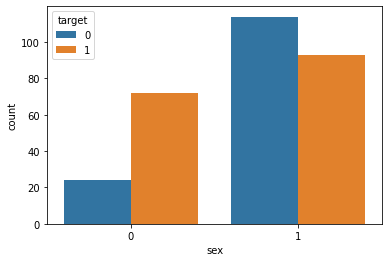

In [21]:
#Target 0 = heart disease, target 1 = no heart disease
sns.countplot(x ='sex', hue = 'target', data = df)

## **The different sexes appear to have a different distribution of target, so I will investigate further in my individual exploration following this section.**

## **What are this dataset's range of ages?**

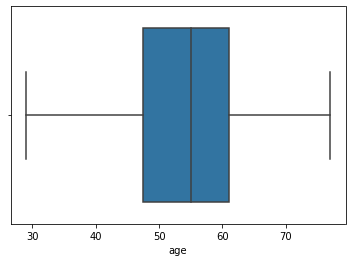

In [24]:
sns.boxplot(df['age'])
plt.show()

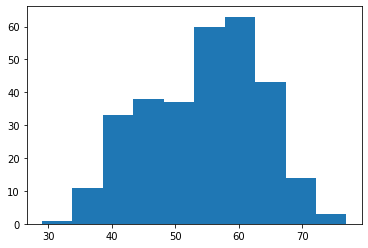

In [25]:
plt.hist(df['age'])
plt.show()

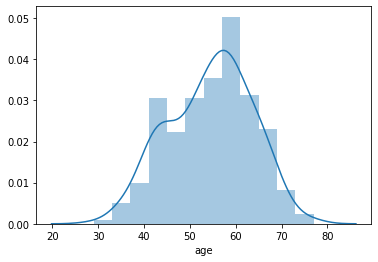

In [26]:
#shows probability distribution vs. actual amounts like in histogram above
sns.distplot(df['age'])

**Generate KDE plots looking at age distribution by target label:**

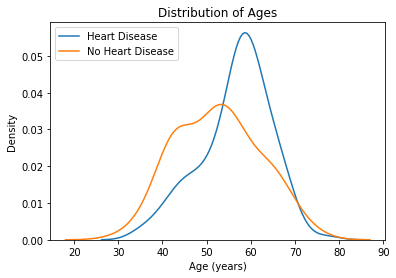

In [27]:

#plt.figure(figsize = (10, 8))
sns.kdeplot(df.loc[df['target'] == 0, 'age'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'age'], label = 'No Heart Disease')
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');


__Find correlations__

In [28]:
correlations = df.corr()

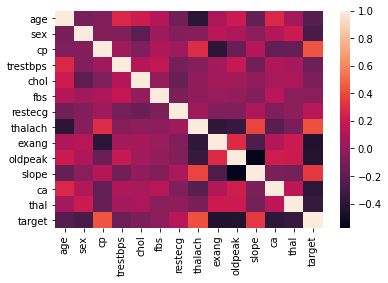

In [29]:
sns.heatmap(correlations)

Greatest positive correlations seem to be chest pain (cp), max heart rate (thalach), and slope of peak ST (slope) with the target heart disease, as well as max heart rate (thalach) + peak ST (slope); and exercise induced angina (exang) + ST depression induced by exercise (oldpeak).

Greatest negative correlations seem to be exang, oldpeak, ca and thal with target, as well as age, exang, oldpeak + thalach; cp + exang; slope + oldpeak

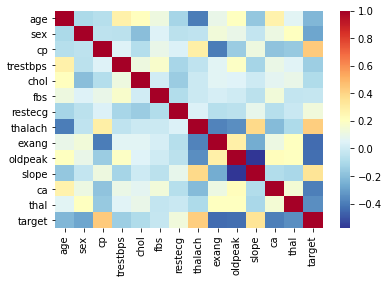

In [30]:
sns.heatmap(correlations,cmap=plt.cm.RdYlBu_r)

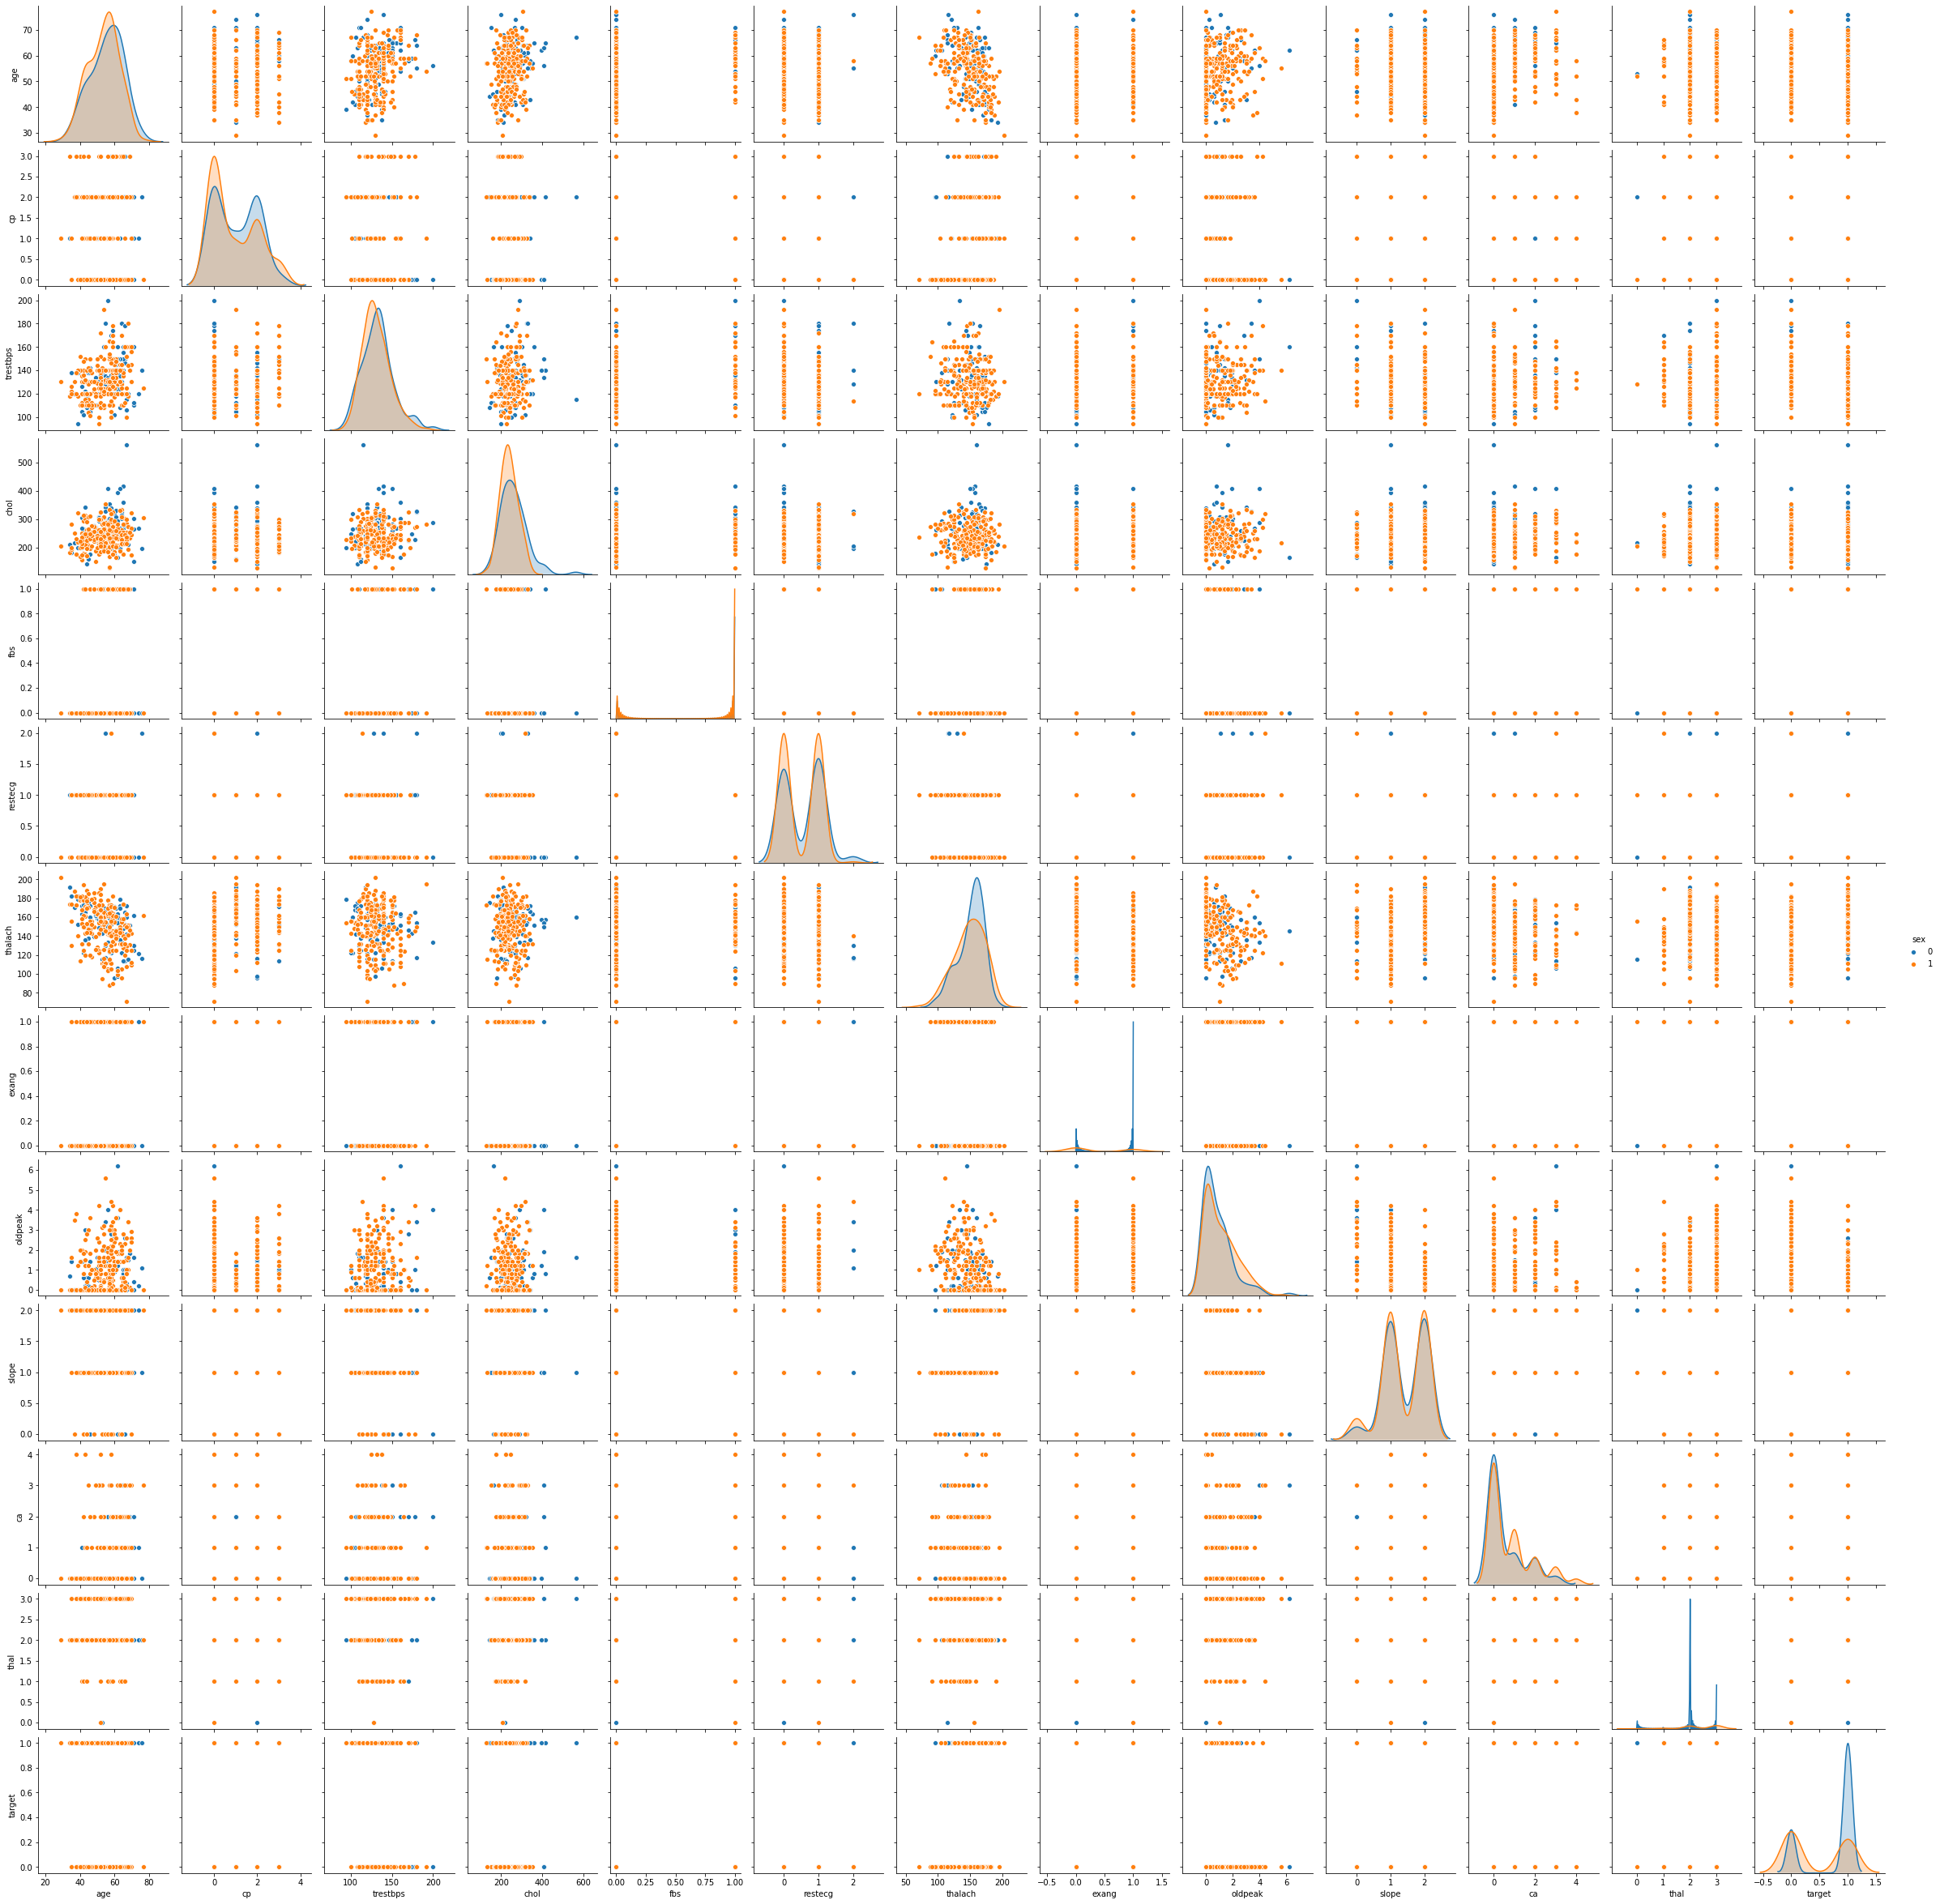

In [31]:
#Pair plots based on sex; will reference in individual exploration below this section
g = sns.pairplot(data=df,hue="sex")

<function matplotlib.pyplot.show>

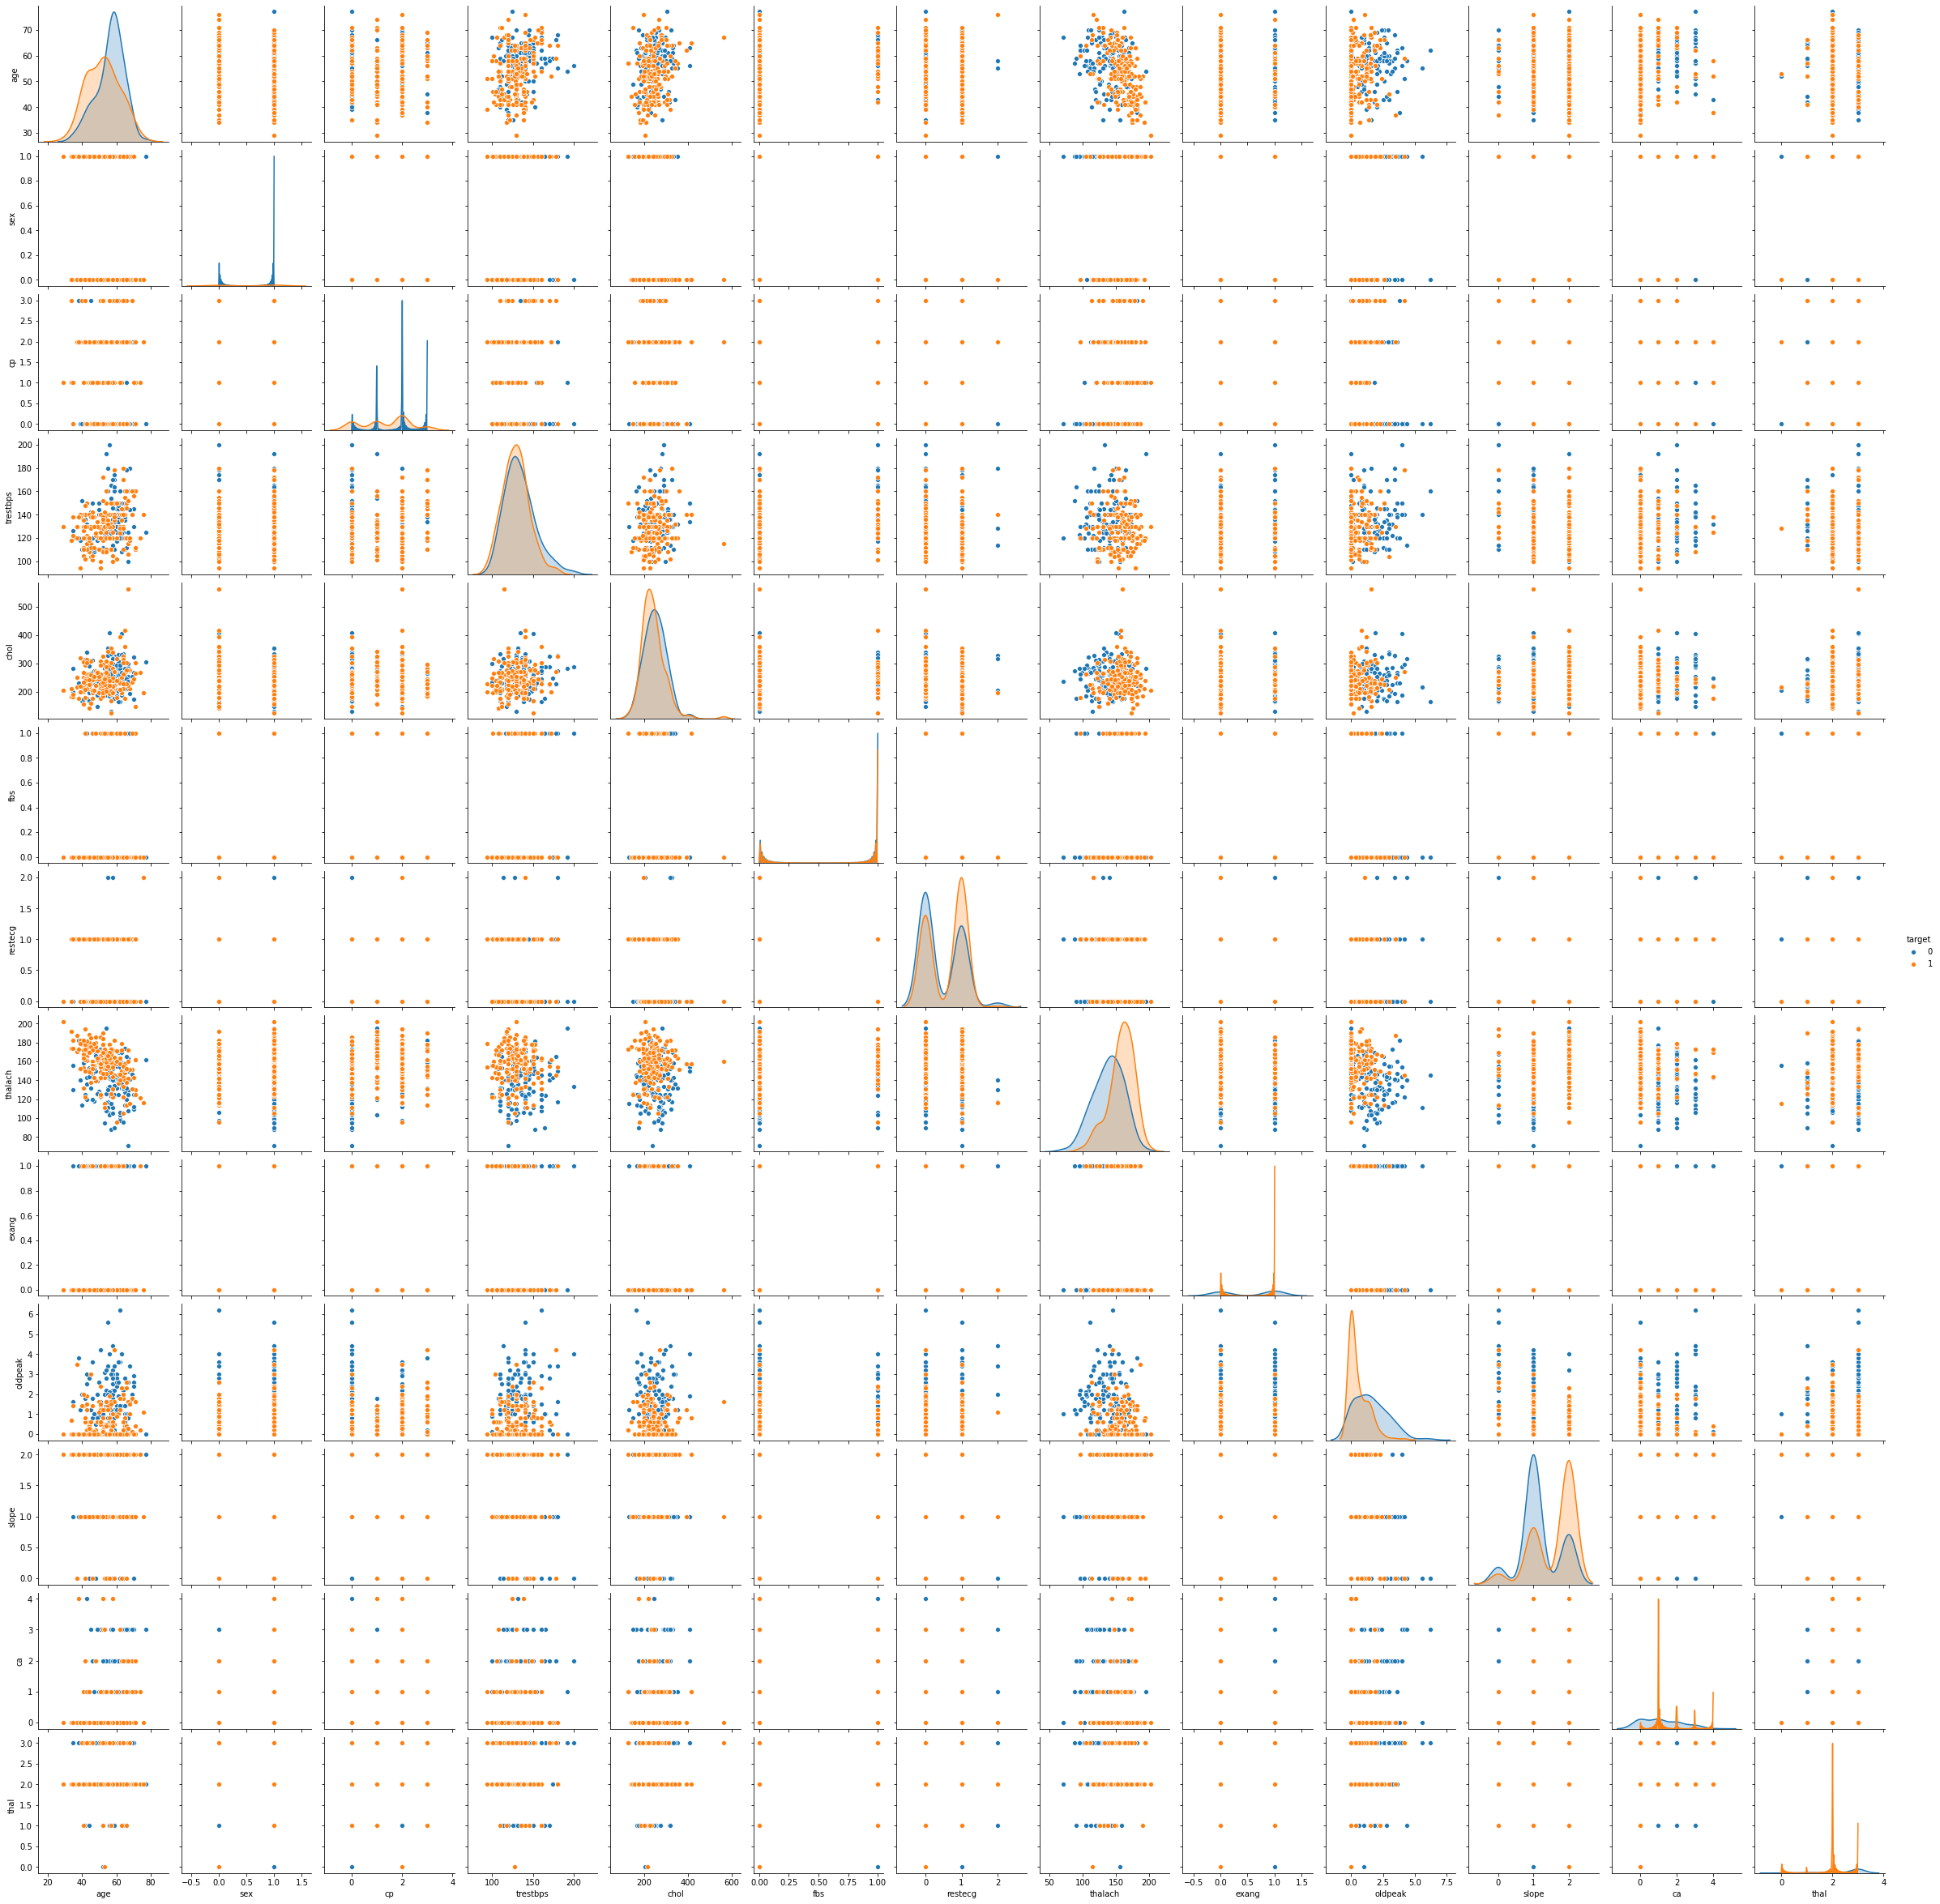

In [32]:
#Pair plot based on target heart disease
sns.pairplot(df, hue="target")
plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

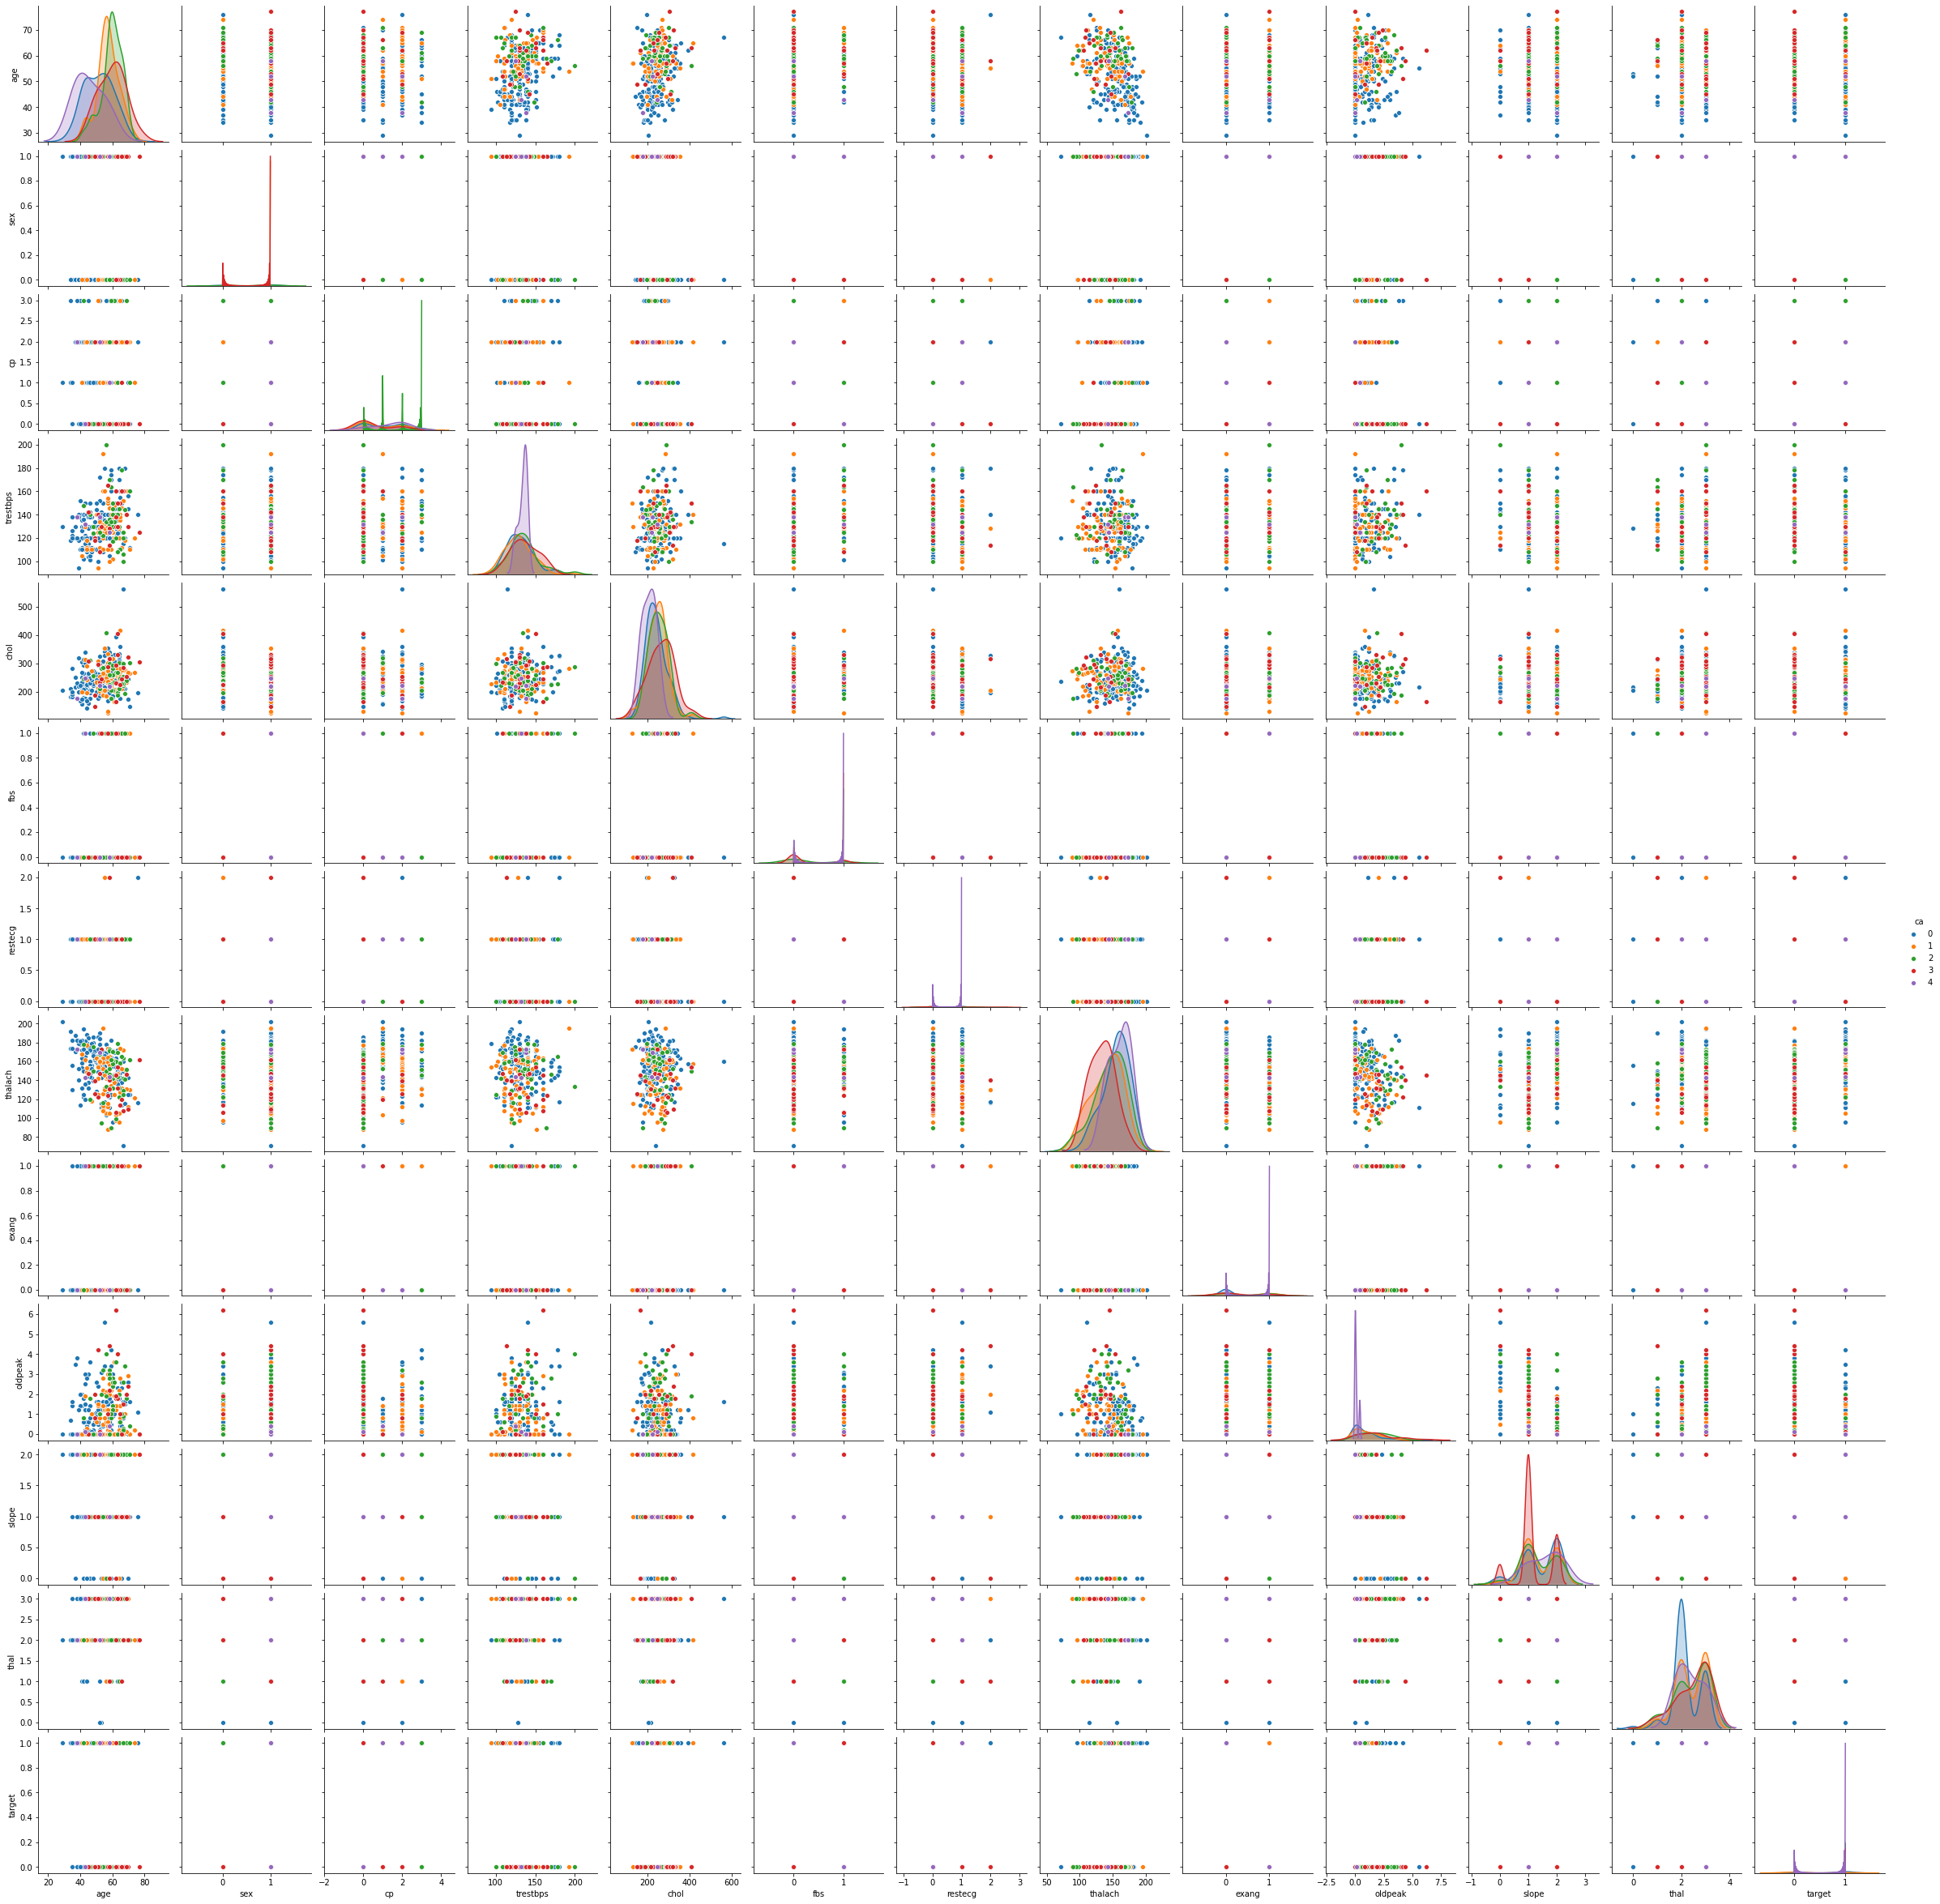

In [33]:
#Pair plot based on ca
sns.pairplot(df, hue="ca")
plt.show

**EDA**

## **Definitions and characteristics of features**

Here is a brief rundown of the meanings of column features:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

1.  age
2.  sex = 0 (female); 1 (male)
3.  chest pain type (4 values)
> -- Value 1: typical angina
>  -- Value 2: atypical angina
>  -- Value 3: non-anginal pain
>  -- Value 4: asymptomatic
4.  resting blood pressure (in mm Hg on admission to the hospital)
5.  serum cholestoral in mg/dl  (For both men and women 20 years and older, a healthy range of total cholesterol is 125 to 200mg/dL https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html)
6. fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
7. resting electrocardiographic results (values 0,1,2)
> -- Value 0: normal
> -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
> -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8.   maximum heart rate achieved
9. exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment

> -- Value 1: upsloping
-- Value 2: flat 
-- Value 3: downsloping 


12. ca:  number of major vessels (0-3) colored by flourosopy 


> (not sure what is meant by "vessels colored"--would like clarification, although looks like majority of non-heart disease targets have ca = 0)



13. thal: 1 = fixed defect; 2 = normal; 3 = reversable defect


> "0 maps to null in the original dataset.
1 maps to 6 in the original dataset. This means that a fixed defect was found.
2 maps to 3 in the original dataset. This means that the blood flow was normal.
3 maps to 7 in the original dataset. This means that a reversible defect was found."  ~Kaggle user Carlos Domínguez: https://www.kaggle.com/ronitf/heart-disease-uci/discussion/92838

And here is a description of how Thal is used:

> "I'll copy a sentence so you get more insight about the "thal" column (thal is for Thalium, a radioactive tracer injected during a stress test):
--Nuclear stress testing requires the injection of a tracer, commonly technicium 99M (Myoview or Cardiolyte), which is then taken up by healthy, viable myocardial cells. A camera (detector) is used afterwards to image the heart and compare segments. A coronary stenosis is detected when a myocardial segment takes up the nuclear tracer at rest, but not during cardiac stress. This is called a "reversible defect." Scarred myocardium from prior infarct will not take up tracer at all and is referred to as a "fixed defect." ~Kaggle user IntiPic: https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877


14.  target = 0 (heart disease); 1 (no heart disease)


> Why? -- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing as shown by "angiographic disease status." This reference I believe has led to much confusion in subsequent research, but discussed more later. https://archive.ics.uci.edu/ml/datasets/Heart+Disease








## **Missing Values:**

This Kaggle Heart data set has 14 features of which there are no missing/null values as shown by df.info() and confirmed by df.isnull(), so we do not need to worry about the missing values for this analysis.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [35]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##  **Duplicate Values**

No duplicate rows found for all 303 samples:

In [36]:
#df.duplicated(subset=None, keep='first')
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

##  **Outliers**

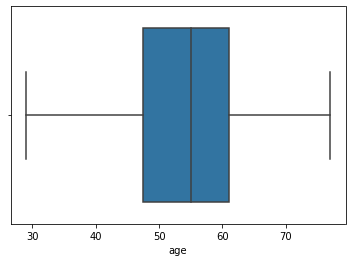

In [37]:
sns.boxplot(x=df['age'])

###I want boxplots for each column/feature:

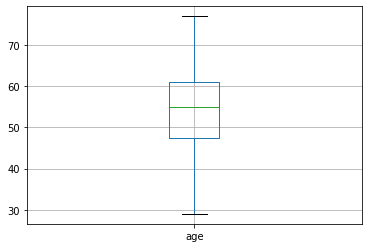

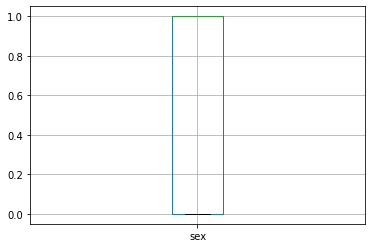

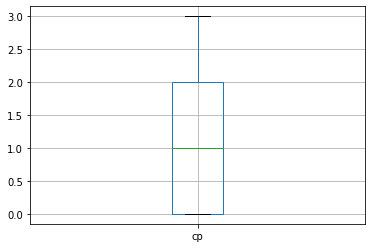

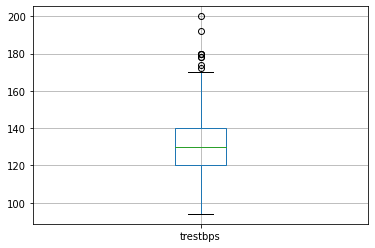

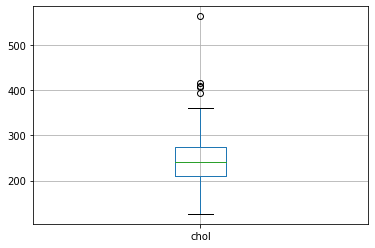

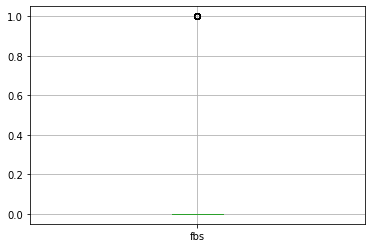

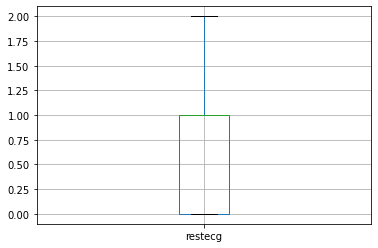

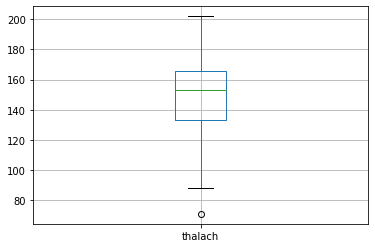

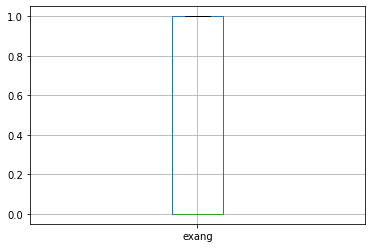

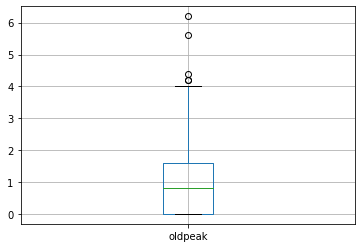

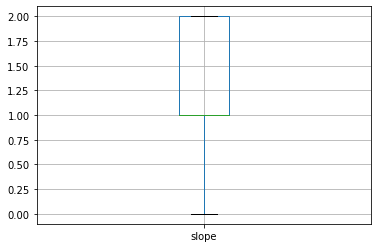

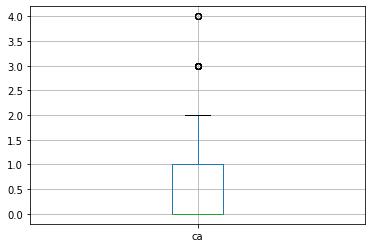

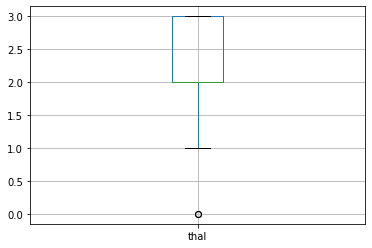

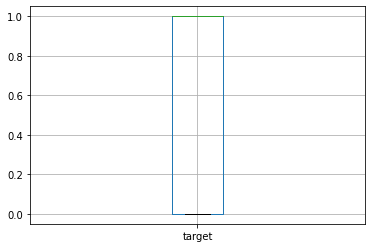

In [38]:
for column in df:
    plt.figure()
    df.boxplot([column])

The boxplots above show outliers for these features:
ca, thal, oldpeak, thalach, fbs, chol, trestbps. 

###The z-scores below, set to higher than absolute value 3, also confirm the same features.

In [39]:
#Now to look at z-scores (from entire dataset)
#The further the score is from 0, the more standard deviations are between that value and the mean, 
#meaning that value is an outlier 
#Accepted values are usually between -3 and 3 standard deviations, so we are looking for: absolute value>3
#This will find absolute value of zscore:

z = np.abs(stats.zscore(df))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [40]:
#Setting z-score value threshold from above to 3
#print(np.where(z > 3))
threshold = 3
zthresh = np.where(z > 3)
print(zthresh)


(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281]), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]))


According to zscores, these feature values are outliers:
    
    Row: 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248, 251, 272, 281
    
    Paired with these columns:
       4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12 

As a reminder, in the table below, we can see the column features match the features shown in the boxplots to include outliers: trestbps (3), chol (4), thalach (7), oldpeak (9), ca (11), thal (12).

##**Do females or males have more outlier values?**

Outliers are split pretty evenly by amount: 7 are female, 9 are male. However, the female outliers include the only cholesterol outliers: 4, 12,  4, 9,  4, 3,  4,
The male outliers include the only ca outliers: 11, 11, 11, 11, 9, 3, 11,  7, 12 

In [41]:
gend_obj = df.iloc[['28',  '48',  '85',  '92', '158', '163', '164', '204', '220', '221', '223', '246', '248', '251', '272', '281']]
gend_obj

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##  **Data Cleaning Solutions**

###Imputation of outlier features

**Here I will take the outlier values from columns: chol, oldpeak, trestbps, and
 thalach, and replace with their corresponding max (or min for thalach) value after the outliers have been removed.** I am excluding the features ca and thal from the group of outliers for imputation, because although they have integer values now, they are more categorical data.


I would like to keep the information to help portray some trends between different groups, like male and female values, whereas deleting the entire person's information might take away something insightful with the extreme values, and also because the number of samples in this dataset is on the smaller side.

In [43]:
#Michelle helped! Here is our beginning step to impute outliers. 
#This shows the z-scores as True (above 3) or False (below 3) instead of numerical zscores

zthresh_bool = np.where(z > 3, True, False)
zthresh_bool.shape
zthresh_bool

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [44]:
#Michelle helped! Here we define a new function to help us replace the "True" outliers found from zscore:

def replace_outliers(col):
  #find the z score of the column
  z = np.abs(stats.zscore(col))
  #drop all values to NaN where z > 3
  zthresh_bool = np.where(z > 3, True, False)
  col = col.mask(zthresh_bool,other=np.nan)
  #find the mean of the column with those excluded, or the max
  max_col = col.max()
  #replace all nan values with the mean or max
  changed_column = col.fillna(max_col)
  return changed_column
  
#when you call replace_outliers, df['col'] = replace_outliers(df['col'])
#df['chol'] = replace_outliers(df['chol'])


In [45]:
#Michelle helped! Testing sample 85, and it is confirmed true according to zscore section:

col = df["chol"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
zthresh_bool[85]

True

In [46]:
#Michelle helped! Setting mask for column name and finding the original
#dataset's max cholesterol value that we will replace:

col = df["chol"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
col = col.mask(zthresh_bool, other=np.nan)
max_col = col.max()
test_max = df['chol'].max()
test_max

564

__Cholesterol feature imputation__

In [47]:
#Michelle helped! Now to see imputation in action--original cholesterol value is 
#replaced with new max value (although after a few times running through this, the "before" value has already been replaced in the set...):

print('before: ', df['chol'][28])
df['chol'] = replace_outliers(df['chol'])
print('after: ', df['chol'][28])

before:  417
after:  394.0


In [48]:
#We can see for sure that chol has been replaced with 394, or the "max value"
df.loc[28]

age          65.0
sex           0.0
cp            2.0
trestbps    140.0
chol        394.0
fbs           1.0
restecg       0.0
thalach     157.0
exang         0.0
oldpeak       0.8
slope         2.0
ca            1.0
thal          2.0
target        1.0
Name: 28, dtype: float64

In [49]:
test_max

564

In [50]:
#Now to do the same for the other "chol" outliers!

print('before: ', df['chol'][85])
df['chol'] = replace_outliers(df['chol'])
print('after: ', df['chol'][85])

before:  394.0
after:  360.0


In [51]:
print('before: ', df['chol'][246])
df['chol'] = replace_outliers(df['chol'])
print('after: ', df['chol'][246])

before:  360.0
after:  360.0


In [52]:
print('before: ', df['chol'][220])
df['chol'] = replace_outliers(df['chol'])
print('after: ', df['chol'][220])


before:  360.0
after:  360.0


In [53]:
z = np.abs(stats.zscore(df))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [54]:
#seeing if cholesterol is still a column included as having outliers (the cholesterol values have disappeared here):
threshold = 3
zthresh = np.where(z > 3)
print(zthresh)

(array([ 48,  92, 158, 163, 164, 204, 221, 223, 248, 251, 272, 281]), array([12, 11, 11, 11, 11,  9,  9,  3,  3, 11,  7, 12]))


__Trestbps feature imputation__

In [55]:
#Test if this sample for trestbps is outlier by zscore:

col = df["trestbps"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
zthresh_bool[223] 

True

In [56]:
#Setting mask for column name and finding the original dataset's max cholesterol value that we will replace:

col = df["trestbps"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
col = col.mask(zthresh_bool, other=np.nan)
max_col = col.max()
test_max = df['trestbps'].max()
test_max

200

In [57]:
#Now to see imputation in action--original cholesterol value is replaced with new max value:

print('before: ', df["trestbps"][223])
df["trestbps"] = replace_outliers(df["trestbps"])
print('after: ', df["trestbps"][223])

before:  200
after:  180.0


In [58]:
#We can see for sure that trestbps has been replaced with 180, or the new "max value"
df.loc[223]

age          56.0
sex           0.0
cp            0.0
trestbps    180.0
chol        288.0
fbs           1.0
restecg       0.0
thalach     133.0
exang         1.0
oldpeak       4.0
slope         0.0
ca            2.0
thal          3.0
target        0.0
Name: 223, dtype: float64

In [59]:
#The boxplot makes it look like this should be closer to 170ish, but turns it to 180 here:

print('before: ', df["trestbps"][248])
df["trestbps"] = replace_outliers(df["trestbps"])
print('after: ', df["trestbps"][248])

before:  180.0
after:  180.0


In [60]:
z = np.abs(stats.zscore(df))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [61]:
#seeing if trestbps is still a column included as having outliers (the trestbps values have disappeared here):
threshold = 3
zthresh = np.where(z > 3)
print(zthresh)

(array([ 48,  92, 158, 163, 164, 204, 221, 251, 272, 281]), array([12, 11, 11, 11, 11,  9,  9, 11,  7, 12]))


###Thalach feature imputation

In [62]:
#Test if this sample for trestbps is outlier by zscore:

col = df["thalach"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
zthresh_bool[272] 

True

In [63]:
def replace_outliers_min(col):
  #find the z score of the column
  z = np.abs(stats.zscore(col))
  #drop all values to NaN where z > 3
  zthresh_bool = np.where(z > 3, True, False)
  col = col.mask(zthresh_bool,other=np.nan)
  #find the mean of the column with those excluded, or the max
  min_col = col.min()
  #replace all nan values with the mean or max
  changed_column = col.fillna(min_col)
  return changed_column

In [64]:
#Setting mask for column name and finding the original dataset's min thalach value that we will replace:

col = df["thalach"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
col = col.mask(zthresh_bool, other=np.nan)
min_col = col.min()
test_min = df["thalach"].min()
test_min

71

In [65]:
#Now to see imputation in action--original cholesterol value is 
#replaced with new max value:

print('before: ', df["thalach"][272])
df["thalach"] = replace_outliers_min(df["thalach"])
print('after: ', df["thalach"][272])

before:  71
after:  88.0


In [66]:
z = np.abs(stats.zscore(df))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [67]:
#seeing if trestbps is still a column included as having outliers (the trestbps values have disappeared here):
threshold = 3
zthresh = np.where(z > 3)
print(zthresh)

(array([ 48,  92, 158, 163, 164, 204, 221, 251, 281]), array([12, 11, 11, 11, 11,  9,  9, 11, 12]))


###Oldpeak imputation

Oldpeak is likely measured in millimeters on an ECG; original UCI reference doesn't say what measurements are used, but  Kaggler Duncan McKinnon explains:
>"Old peak is a measure of the depression occurring in the ST segment (mm). A value greater than 0.5mm indicates a weakened heart and an increased risk of cardiac events such as heart attack."
https://www.kaggle.com/ronitf/heart-disease-uci/discussion/151898

In [68]:
#Test if this sample for oldpeak is outlier by zscore:

col = df["oldpeak"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
zthresh_bool[204] 

True

In [69]:
def replace_outliers_max(col):
  #find the z score of the column
  z = np.abs(stats.zscore(col))
  #drop all values to NaN where z > 3
  zthresh_bool = np.where(z > 3, True, False)
  col = col.mask(zthresh_bool,other=np.nan)
  #find the mean of the column with those excluded, or the max
  max_col = col.max()
  #replace all nan values with the mean or max
  changed_column = col.fillna(max_col)
  return changed_column

In [70]:
#Setting mask for column name and finding the original
#dataset's max oldpeak value that we will replace:

col = df["oldpeak"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
col = col.mask(zthresh_bool, other=np.nan)
max_col = col.max()
test_max = df["oldpeak"].max()
test_max

6.2

In [71]:
#Now to see imputation in action--original oldpeak value is replaced with new max value:

print('before: ', df["oldpeak"][204])
df["oldpeak"] = replace_outliers_max(df["oldpeak"])
print('after: ', df["oldpeak"][204])

before:  6.2
after:  4.4


In [72]:
df.loc[204]

age          62.0
sex           0.0
cp            0.0
trestbps    160.0
chol        164.0
fbs           0.0
restecg       0.0
thalach     145.0
exang         0.0
oldpeak       4.4
slope         0.0
ca            3.0
thal          3.0
target        0.0
Name: 204, dtype: float64

In [73]:
#Test if this sample for oldpeak is outlier by zscore:

col = df["oldpeak"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
zthresh_bool[221] 

True

In [74]:
def replace_outliers_max(col):
  #find the z score of the column
  z = np.abs(stats.zscore(col))
  #drop all values to NaN where z > 3
  zthresh_bool = np.where(z > 3, True, False)
  col = col.mask(zthresh_bool,other=np.nan)
  #find the mean of the column with those excluded, or the max
  max_col = col.max()
  #replace all nan values with the mean or max
  changed_column = col.fillna(max_col)
  return changed_column

In [75]:
#Setting mask for column name and finding the original
#dataset's max oldpeak value that we will replace:

col = df["oldpeak"]
z = np.abs(stats.zscore(col))
zthresh_bool = np.where(z > 3, True, False)
col = col.mask(zthresh_bool, other=np.nan)
max_col = col.max()
test_max = df["oldpeak"].max()
test_max

4.4

In [76]:
#Now to see imputation in action--original oldpeak value is replaced with new max value:

print('before: ', df["oldpeak"][221])
df["oldpeak"] = replace_outliers_max(df["oldpeak"])
print('after: ', df["oldpeak"][221])

before:  4.4
after:  4.2


In [77]:
df.loc[221]

age          55.0
sex           1.0
cp            0.0
trestbps    140.0
chol        217.0
fbs           0.0
restecg       1.0
thalach     111.0
exang         1.0
oldpeak       4.2
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 221, dtype: float64

In [78]:
z = np.abs(stats.zscore(df))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [79]:
#seeing if oldpeak is still a column included as having outliers (the oldpeak values have disappeared here):
threshold = 3
zthresh = np.where(z > 3)
print(zthresh)

(array([ 48,  92, 158, 163, 164, 251, 281]), array([12, 11, 11, 11, 11, 11, 12]))


**Here is the modified dataset with non-categorical outliers changed to max (or min) values.**
This includes a description with the new data values and an example model to compare to the model on the whole, non-modified data set done in class

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [81]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.518152,244.973597,0.148515,0.528053,149.702970,0.326733,1.027723,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.190754,47.144409,0.356198,0.525860,22.732046,0.469794,1.119258,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000


In [82]:
df['target'] = df['target'].replace(to_replace = [0, 1], value = [True, False])

In [83]:
X = df.drop(columns=['target'])
y= df['target']

In [84]:
r_state = 35

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=r_state) 


In [86]:
X_train.shape

(203, 13)

In [87]:
X_test.shape

(100, 13)

In [88]:
my_model = LogisticRegression(random_state=r_state)
my_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=35, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_pred = my_model.predict(X_test)

In [90]:
y_pred

array([False,  True,  True,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False])

In [91]:
y_test.to_numpy()

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False, False,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
       False])

In [92]:
my_model.score(X_test, y_test)

0.83

This score went down 1% from the whole dataset logistic regression we did in class--will see if One Hot Encoding may help, but if not, I will abandon the min/max outlier modified data set to this Part 1 EDA Notebook.

**One Hot Encoding this modified, non-outlier data set**

I will see here if it can beat the .84 score that the whole, non-modified data set got from our in-class modeling. If it is higher, I may put in the Part 2 Modeling Notebook for this project. If not, I will leave it here just as an example of feature engineering on the data set with no outliers.

**One-hot encoded dataset for features sex, cp, slope and thal:**

In [93]:
#df.head will show columns for original dataframe
dataset = pd.get_dummies(df, columns = ['sex','cp', 'slope', 'thal'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,False
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,False
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,False
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,False
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,False


In [94]:
#dataset.head will show columns for one-hot encoded sex, cp, slope, and thal features in the no-outlier data set:
dataset.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145.0,233.0,1,0,150.0,0,2.3,0,False,0,1,0,0,0,1,1,0,0,0,1,0,0
1,37,130.0,250.0,0,1,187.0,0,3.5,0,False,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,130.0,204.0,0,0,172.0,0,1.4,0,False,1,0,0,1,0,0,0,0,1,0,0,1,0
3,56,120.0,236.0,0,1,178.0,0,0.8,0,False,0,1,0,1,0,0,0,0,1,0,0,1,0
4,57,120.0,354.0,0,1,163.0,1,0.6,0,False,1,0,1,0,0,0,0,0,1,0,0,1,0


Making sure dataset has the modified min/max outliers like df

In [95]:
dataset.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.518152,244.973597,0.148515,0.528053,149.702970,0.326733,1.027723,0.729373,0.316832,0.683168,0.471947,0.165017,0.287129,0.075908,0.069307,0.462046,0.468647,0.006601,0.059406,0.547855,0.386139
std,9.082101,17.190754,47.144409,0.356198,0.525860,22.732046,0.469794,1.119258,1.022606,0.466011,0.466011,0.500038,0.371809,0.453171,0.265288,0.254395,0.499382,0.499842,0.081110,0.236774,0.498528,0.487668
min,29.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,180.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.200000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
dX = dataset.drop(columns=['target'])
dy= dataset['target']

In [97]:
r_state = 35

In [98]:
dX_train, dX_test, dy_train, dy_test = train_test_split(dX, dy, test_size=0.33, random_state=r_state) 


In [99]:
dX_train.shape

(203, 22)

In [100]:
dX_test.shape

(100, 22)

In [101]:
d_model = LogisticRegression(random_state=r_state)
d_model.fit(dX_train, dy_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=35, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
dy_pred = d_model.predict(dX_test)

In [103]:
dy_pred

array([False,  True,  True,  True, False, False,  True, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True, False,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False])

In [104]:
dy_test.to_numpy()

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False, False,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
       False])

In [105]:
d_model.score(dX_test, dy_test)

0.85

**One-hot encoding seemed to help raise our no-outlier model's score by 2%**

**This is 1% lower than the same model with non-modified outliers shown in Part 2 Modeling Notebook for this project, so I will abandon the min/max outlier modification to this notebook.**


